In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# after downloading the data from Kaggle, pd.read_csv is to read the data in your notebook. 
#This dataset was filtered down to summer games only and years from 2008 to 2012 to then go on to complete the data cleaning
data = pd.read_csv('datatouse.csv')
data

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1,79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
2,80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
3,98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
4,134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,271055,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
40206,271089,135557,Dominik ycki,M,34.0,192.0,95.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Men's Two Person Keelboat,NaN
40207,271090,135557,Dominik ycki,M,38.0,192.0,95.0,Poland,POL,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Keelboat,NaN
40208,271091,135558,ukasz Tomasz ygado,M,32.0,200.0,89.0,Poland,POL,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,NaN


In [4]:
#Filtering out all columns and keeping only Team, Year, Event, Medal columns using copy()
new_data = data[['Team', 'Year', 'Event', 'Medal']].copy()
new_data

,Team,Year,Event,Medal
0,China,2012,Judo Men's Extra-Lightweight,NaN
1,Norway,2008,Handball Women's Handball,Gold
2,Romania,2016,Weightlifting Women's Super-Heavyweight,NaN
3,France,2012,"Athletics Men's 1,500 metres",NaN
4,Morocco,2012,Boxing Men's Light-Welterweight,NaN
...,...,...,...,...
40205,Kazakhstan,2016,Athletics Women's 4 x 100 metres Relay,NaN
40206,Poland,2008,Sailing Men's Two Person Keelboat,NaN
40207,Poland,2012,Sailing Men's Two Person Keelboat,NaN
40208,Poland,2012,Volleyball Men's Volleyball,NaN


In [5]:
#Data_country was from looking at the full dataset in excel and filtering down only to countries that participated in the women's athletics events i wanted to track. This was to see if i was on the right track but it has no bearing on the rest of the sets i was doing.
data_country = new_data[(new_data['Team'] == "Bahamas") | (new_data['Team'] == "Belgium") | (new_data['Team'] == "Great Britain") | (new_data['Team'] == "Jamaica") | (new_data['Team'] == "Netherlands") | (new_data['Team'] == "Nigeria") | (new_data['Team'] == "Russia") | (new_data['Team'] == "Ukraine") | (new_data['Team'] == "United States")]
data_country

,Team,Year,Event,Medal
16,Russia,2008,Athletics Women's Javelin Throw,Silver
17,Russia,2012,Athletics Women's Javelin Throw,NaN
37,Netherlands,2016,Handball Women's Handball,NaN
44,United States,2016,"Cycling Women's Road Race, Individual",NaN
45,United States,2008,Softball Women's Softball,Silver
...,...,...,...,...
40187,Russia,2016,Swimming Women's 100 metres Backstroke,NaN
40188,Russia,2016,Swimming Women's 200 metres Backstroke,NaN
40189,Russia,2016,Swimming Women's 4 x 100 metres Medley Relay,NaN
40192,Russia,2008,Tennis Women's Singles,Bronze


In [6]:
#data_event also uses the new_data set to only bring out specific women's track events: 400 x 100 metres relay, 4 x 400 metres relay, 100 metres, 200 metres and 400 metres.
data_event = new_data[(new_data['Event'] == "Athletics Women's 4 x 100 metres Relay") | (new_data['Event'] == "Athletics Women's 4 x 400 metres Relay") | (new_data['Event'] == "Athletics Women's 100 metres") | (new_data['Event'] == "Athletics Women's 200 metres") | (new_data['Event'] == "Athletics Women's 400 metres")]
data_event.to_csv(r'dataevent.csv')
data_event

,Team,Year,Event,Medal
99,Brunei,2016,Athletics Women's 200 metres,NaN
101,Iraq,2008,Athletics Women's 100 metres,NaN
102,Iraq,2012,Athletics Women's 100 metres,NaN
165,Nigeria,2012,Athletics Women's 4 x 100 metres Relay,NaN
180,Nigeria,2012,Athletics Women's 4 x 400 metres Relay,NaN
...,...,...,...,...
40160,Malaysia,2016,Athletics Women's 100 metres,NaN
40202,Kazakhstan,2012,Athletics Women's 200 metres,NaN
40203,Kazakhstan,2016,Athletics Women's 100 metres,NaN
40204,Kazakhstan,2016,Athletics Women's 200 metres,NaN


In [7]:
#data_medalonly. This was to drop the null values under Medal using dropna()
data_medalonly = data_event.dropna()
data_medalonly.to_csv(r'medalonly.csv')
data_medalonly

,Team,Year,Event,Medal
599,United States,2016,Athletics Women's 4 x 100 metres Relay,Gold
1427,Russia,2012,Athletics Women's 4 x 400 metres Relay,Silver
1730,Great Britain,2016,Athletics Women's 4 x 100 metres Relay,Bronze
2164,United States,2012,Athletics Women's 4 x 400 metres Relay,Gold
3976,Belgium,2008,Athletics Women's 4 x 100 metres Relay,Silver
...,...,...,...,...
38414,Jamaica,2012,Athletics Women's 4 x 400 metres Relay,Bronze
38437,Jamaica,2008,Athletics Women's 4 x 400 metres Relay,Bronze
38439,Jamaica,2012,Athletics Women's 4 x 400 metres Relay,Bronze
38440,Jamaica,2016,Athletics Women's 4 x 400 metres Relay,Silver


In [37]:
#data exploration
#medalfinal was to create a dataset using group by and count to group and count the medals according to Team, Event, Year and create a medalcount column
medalfinal = data_medalonly.groupby(['Team', 'Event', 'Year'])['Medal'].count().reset_index(name="Medalcount")
medalfinal

,Team,Event,Year,Medalcount
0,Bahamas,Athletics Women's 400 metres,2016,1
1,Belgium,Athletics Women's 4 x 100 metres Relay,2008,4
2,Great Britain,Athletics Women's 4 x 100 metres Relay,2016,4
3,Great Britain,Athletics Women's 4 x 400 metres Relay,2016,5
4,Great Britain,Athletics Women's 400 metres,2008,1
5,Great Britain,Athletics Women's 400 metres,2012,1
6,Jamaica,Athletics Women's 100 metres,2008,3
7,Jamaica,Athletics Women's 100 metres,2012,2
8,Jamaica,Athletics Women's 100 metres,2016,2
9,Jamaica,Athletics Women's 200 metres,2008,2


In [112]:
#pivot table was to reshape the data so matplotlib can read ans plot it as clustered bar graphs properly
medalfinal.pivot_table(index=['Year', 'Team'], columns ='Event')

Medalcount                               \
Event              Athletics Women's 100 metres Athletics Women's 200 metres   
Year Team                                                                      
2008 Belgium                                NaN                          NaN   
     Great Britain                          NaN                          NaN   
     Jamaica                                3.0                          2.0   
     Nigeria                                NaN                          NaN   
     Russia                                 NaN                          NaN   
     United States                          NaN                          1.0   
2012 Great Britain                          NaN                          NaN   
     Jamaica                                2.0                          1.0   
     Russia                                 NaN                          NaN   
     Ukraine                                NaN                          NaN   
     United States                          1.0                          2.0   
2016 Bahamas                                NaN                          NaN   
     Great Britain                          NaN                          NaN   
     Jamaica                                2.0                          1.0   
     Netherlands                            NaN                          1.0   
     United States                          1.0                          1.0   

                                                           \
Event              Athletics Women's 4 x 100 metres Relay   
Year Team                                                   
2008 Belgium                                          4.0   
     Great Britain                                    NaN   
     Jamaica                                          NaN   
     Nigeria                                          5.0   
     Russia                                           4.0   
     United States                                    NaN   
2012 Great Britain                                    NaN   
     Jamaica                                          6.0   
     Russia                                           NaN   
     Ukraine                                          4.0   
     United States                                    6.0   
2016 Bahamas                                          NaN   
     Great Britain                                    4.0   
     Jamaica                                          6.0   
     Netherlands                                      NaN   
     United States                                    5.0   

                                                           \
Event              Athletics Women's 4 x 400 metres Relay   
Year Team                                                   
2008 Belgium                                          NaN   
     Great Britain                                    NaN   
     Jamaica                                          5.0   
     Nigeria                                          NaN   
     Russia                                           6.0   
     United States                                    5.0   
2012 Great Britain                                    NaN   
     Jamaica                                          5.0   
     Russia                                           6.0   
     Ukraine                                          NaN   
     United States                                    6.0   
2016 Bahamas                                          NaN   
     Great Britain                                    5.0   
     Jamaica                                          6.0   
     Netherlands                                      NaN   
     United States                                    6.0   

                                                 
Event              Athletics Women's 400 metres  
Year Team                                        
2008 Belgium                                Na

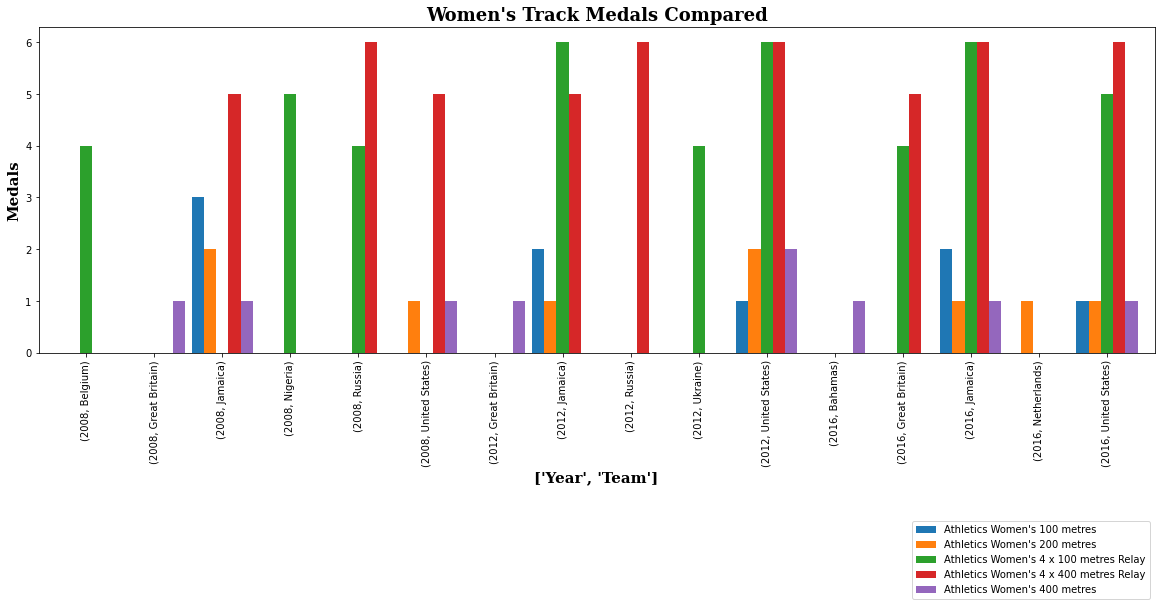

In [117]:
#use of matplotlib through the pivot table to plot a grouped by bar chart and define the width and figure size.
medalfinal.pivot_table(index=['Year', 'Team'], columns ='Event').plot(kind='bar', width= 0.9, figsize=(20, 6), y='Medalcount')

#defining the font for the title and labels.
font1 = {'family':'serif','color':'black','weight':'bold','size':18}
font2 = {'family':'serif','color':'black','weight':'bold','size':15}

#Define the title, x and y labels
plt.title("Women's Track Medals Compared", fontdict = font1)
plt.xlabel(['Year', 'Team'], fontdict = font2)
plt.ylabel("Medals", fontdict = font2)

#legend to give a key for the various track events that were being analysed
plt.legend(bbox_to_anchor=(1, -0.5))